<a href="https://colab.research.google.com/github/Tringapps-Ranjithkumar/DataBlitz/blob/main/DataBlitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing the required Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
import seaborn as sns

In [5]:
#Loading the Dataset
data = pd.read_csv('/content/housing.csv')

In [16]:
#Overview of the dataset
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
#Preprocessing checking for the null values in dataset
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#Replacing all the null values in the dataset by there corresponding to maintain balanced dataset
meanVal = data['total_bedrooms'].mean()
data['total_bedrooms'].fillna(value=meanVal, inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
#One Hot Encoding converting the string values to Integers
onehotencoding = []
for i in data['ocean_proximity']:
  if i == 'NEAR BAY':
    onehotencoding.append(0)
  elif i == '<1H OCEAN':
    onehotencoding.append(1)
  elif i == 'INLAND':
    onehotencoding.append(2)
  elif i == 'NEAR OCEAN':
    onehotencoding.append(3)
  else:
    onehotencoding.append(4)

In [10]:
#After the encoding the view
data['ocean_proximity']=onehotencoding
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


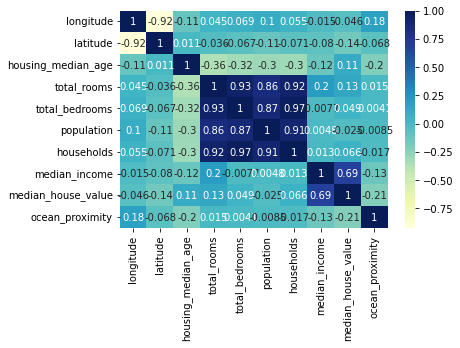

In [11]:
#Display the corellation between the attributes
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [19]:
#Splitting into dependent and Independent variables
y=pd.DataFrame(data.iloc[:,-2])
dp=data.drop(labels='median_house_value', axis=1)
x=pd.DataFrame(dp.iloc[:,:])
print(x)
print(y)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean

In [32]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)



(16512, 9)
(4128, 9)
(16512, 1)
(16512, 1)


In [21]:
#Fitting the multiple regression model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
#Printing the xtrain and xtest
print(reg.predict(x_train))
y_pred = reg.predict(x_test)
print(y_pred)

[[236027.26583972]
 [225657.97025424]
 [108329.50770442]
 ...
 [128105.59899069]
 [110120.56870264]
 [183130.95285313]]
[[242104.5015195 ]
 [102506.84272774]
 [252123.49015592]
 ...
 [274422.60558237]
 [260358.94879444]
 [157179.64254325]]


In [30]:
#Printing the Accuracy Score for the model
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)
print('Train Score: ', reg.score(x_train, y_train))  
print('Test Score: ', reg.score(x_test, y_test))

 Accuracy of the model is 62.85
Train Score:  0.6376598173399564
Test Score:  0.6284840283294761


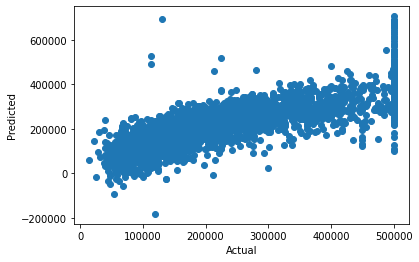

In [28]:
#Ploting the Actual Vs Predicted Values
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

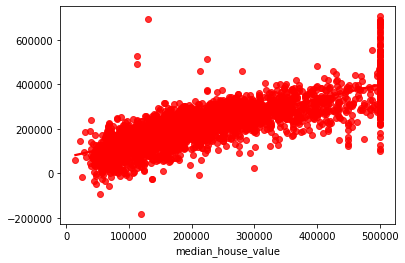

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');